In [1]:
import pandas as pd
from pandas import DataFrame

def load(path: str) -> DataFrame:
    """
    @param path: str
    @return: DataFrame

    @description: Load and print the dimensions of the dataset from the given path.
    """
    try:
        if isinstance(path, str) == False:
            raise ValueError("Path is not a string")
        if path[-4:] != ".csv":
            raise ValueError("Path is not a .csv file")
        df = pd.read_csv(path)
        print("Loading dataset of dimensions",df.shape)
        return df
    except:
        print("Error loading dataset")
        return None

In [26]:
from load_csv import load
from pandas import DataFrame
import matplotlib.pyplot as plt

def show_population_total(dataFrame: DataFrame):
    """
    @param dataFrame: DataFrame
    @return: None

    @description: Show a graph of the population total in the dataset.
    """
    try:
        if isinstance(dataFrame, DataFrame) is False:
            raise ValueError("Data is not a DataFrame")
        if "Morocco" not in dataFrame["country"].values:
            raise ValueError("Morocco is not in the dataset")
        morocco = dataFrame[dataFrame["country"] == "Morocco"]
        otherCountry = dataFrame[dataFrame["country"] == "United States"]

        years = morocco.columns[1:]
        morocco_population = morocco.values[0][1:]
        otherCountry_population = otherCountry.values[0][1:]
        years = [str(year) for year in years]
        morocco_population = [float(pop[:-1]) * 1e6 if pop.endswith("M") else int(pop) for pop in morocco_population]
        otherCountry_population = [float(pop[:-1]) * 100 if pop.endswith("M") else int(pop) for pop in otherCountry_population]
        plt.plot(years, morocco_population, label="Morocco")
        plt.plot(years, otherCountry_population, label="United States")
        plt.title("Population Projections")
        plt.xlabel("Year")
        plt.ylabel("Population")
        plt.xticks(range(0, len(years) - 40, 40))
        plt.yticks(range(20000000, 60000000, 20000000))
        plt.legend()
        plt.show()
    except Exception as e:
        print("Error showing graph", e)

Loading dataset of dimensions (197, 302)


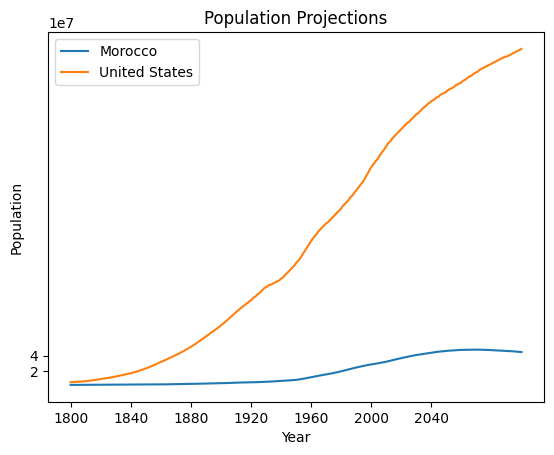

In [27]:
def main():
    show_population_total(load("population_total.csv"))

if __name__ == "__main__":
    main()